- First visit 👉 [Random_Forest_Classifier](../Classification_Algos/Random_Forest_Classifier.ipynb)

In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv("assets/house_price_prediction_data.csv")

X = df.drop("Price", axis=1)
y = df["Price"]

In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [8]:
model = RandomForestRegressor(n_estimators=150, max_depth=8, random_state=42, n_jobs=1)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [14]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.3f}")
print(f"MSE: {mse:.3f}")
print(f"RMSE: {rmse:.3f}")
print(f"R² : {r2:,.3f}")

MAE: 15360.665
MSE: 324230378.345
RMSE: 18006.398
R² : 0.922


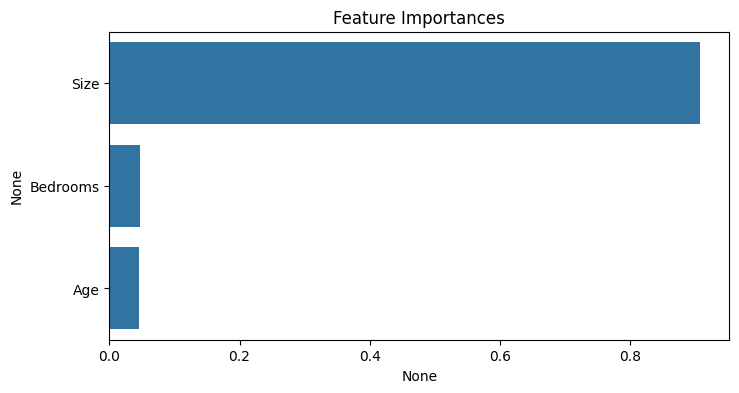

In [13]:
importances = pd.Series(model.feature_importances_, index=X.columns)
plt.figure(figsize=(8, 4))
sns.barplot(x=importances, y=importances.index)
plt.title("Feature Importances")
plt.show()